<a href="https://colab.research.google.com/github/iyungrozy/CNN-IMAGE-CLASSIFICATION/blob/main/Image_Classification_Kopi_atau_tidak_dengan_CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from IPython.display import Image

In [26]:
# Import dataset
import pathlib
path = "drive/My Drive/UAS AI/training"
data_dir = pathlib.Path(path)

In [27]:
batch_size = 16
img_height = 180
img_width = 180

# Split data training dan data validasi
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size)

validation_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "validation",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size=batch_size)

Found 25 files belonging to 2 classes.
Using 20 files for training.
Found 25 files belonging to 2 classes.
Using 5 files for validation.


In [28]:
# Konversi ke dalam bentuk CNN
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_data = train_data.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_data))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [29]:
# Membuat model
num_classes = 2
model = Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu' ),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [30]:
# Kompilasi model
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 45, 45, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 45, 45, 64)       

In [31]:
# Melakukan pelatihan model
epochs = 10
history = model.fit(train_data,
                    validation_data = validation_data,
                    epochs = epochs)

Epoch 1/10
2/2 [==============================] - 2s 452ms/step - loss: 1.6254 - accuracy: 0.9000 - val_loss: 2.6853 - val_accuracy: 0.8000
Epoch 2/10
2/2 [==============================] - 1s 394ms/step - loss: 1.3838 - accuracy: 0.9000 - val_loss: 0.8380 - val_accuracy: 0.8000
Epoch 3/10
2/2 [==============================] - 1s 394ms/step - loss: 0.3336 - accuracy: 0.9000 - val_loss: 0.5676 - val_accuracy: 0.8000
Epoch 4/10
2/2 [==============================] - 1s 410ms/step - loss: 0.4637 - accuracy: 0.9000 - val_loss: 0.5381 - val_accuracy: 0.8000
Epoch 5/10
2/2 [==============================] - 1s 410ms/step - loss: 0.3226 - accuracy: 0.9000 - val_loss: 1.0887 - val_accuracy: 0.8000
Epoch 6/10
2/2 [==============================] - 1s 234ms/step - loss: 0.5316 - accuracy: 0.9000 - val_loss: 0.9405 - val_accuracy: 0.8000
Epoch 7/10
2/2 [==============================] - 1s 236ms/step - loss: 0.4082 - accuracy: 0.9000 - val_loss: 0.5361 - val_accuracy: 0.8000
Epoch 8/10
2/2 [====

1/1 [==============================] - 0s 96ms/step


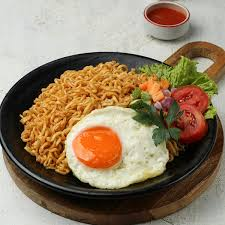

Gambar ini mendekati non coffe dengan tingkat kepercayaan sebesar 90.00 persen


In [32]:
# Prediksi model
# Gambar 1
path1 = "drive/My Drive/UAS AI/test/mie.jpeg"
img1 = keras.preprocessing.image.load_img(
    path1,
    target_size = (img_height, img_width))
img_array1 = keras.preprocessing.image.img_to_array(img1)
img_array1 = tf.expand_dims(img_array1, 0)
predictions1 = model.predict(img_array1)
score1 = tf.nn.softmax(predictions1[0])
display(Image(filename = path1))

# Define the class names
class_names = ['non coffe', 'coffe'] # Replace with your actual class names

print("Gambar ini mendekati {} dengan tingkat kepercayaan sebesar {:.2f} persen"
.format(class_names[np.argmax(score1)], 100*np.max(score1)))



# Gambar 2
path2 = "drive/My Drive/UAS AI/test/test 2.jpg"
img2 = keras.preprocessing.image.load_img(
    path2,
    target_size = (img_height, img_width))
img_array2 = keras.preprocessing.image.img_to_array(img2)
img_array2 = tf.expand_dims(img_array2, 0)
predictions2 = model.predict(img_array2)
score2 = tf.nn.softmax(predictions2[0])
display(Image(filename = path2))

print("Gambar ini mendekati {} dengan tingkat kepercayaan sebesar {:.2f} persen"
.format(class_names[np.argmax(score2)], 100*np.max(score2)))

# Gambar 3
path3 = "drive/My Drive/UAS AI/.jpg"
img3 = keras.preprocessing.image.load_img(
    path3,
    target_size = (img_height, img_width))
img_array3 = keras.preprocessing.image.img_to_array(img3)
img_array3 = tf.expand_dims(img_array3, 0)
predictions3 = model.predict(img_array3)
score3 = tf.nn.softmax(predictions3[0])
display(Image(filename = path3))

print("Gambar ini mendekati {} dengan tingkat kepercayaan sebesar {:.2f} persen"
.format(class_names[np.argmax(score3)], 100*np.max(score3)))